In [ ]:
!git clone https://github.com/HongJeSeong/camp_data.git

Cloning into 'camp_data'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 99 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (99/99), done.


In [ ]:
!ls camp_data

covidKorea.csv	img		    README.md	src
covidTime.csv	influenzaCovid.csv  review.txt	wine.csv


In [ ]:
import pandas as pd
df = pd.read_csv("camp_data/covidKorea.csv")
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,KOR,Asia,South Korea,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,0.039,0.020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,0.000,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,0.00,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.903
1,KOR,Asia,South Korea,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.039,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,0.00,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.903
2,KOR,Asia,South Korea,2020-01-26,3.0,1.0,NaN,NaN,NaN,NaN,0.059,0.020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,0.001,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,0.00,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.903
3,KOR,Asia,South Korea,2020-01-27,4.0,1.0,NaN,NaN,NaN,NaN,0.078,0.020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,57.0,0.001,0.000,NaN,NaN,NaN,NaN,people tested,NaN,NaN,0.00,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.903
4,KOR,Asia,South Korea,2020-01-28,4.0,0.0,0.429,NaN,NaN,0.000,0.078,0.000,0.008,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.0,187.0,0.004,0.003,25.0,0.000,0.017,58.3,people tested,NaN,NaN,0.00,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,KOR,Asia,South Korea,2020-12-12,42766.0,1030.0,745.714,580.0,2.0,5.000,834.146,20.090,14.545,11.313,0.039,0.098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29597.0,3263122.0,63.647,0.577,21270.0,0.415,0.035,28.5,people tested,NaN,NaN,63.43,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.903
324,KOR,Asia,South Korea,2020-12-13,43484.0,718.0,760.429,587.0,7.0,5.429,848.151,14.005,14.832,11.449,0.137,0.106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21344.0,3284466.0,64.063,0.416,22474.0,0.438,0.034,29.6,people tested,NaN,NaN,63.43,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.903
325,KOR,Asia,South Korea,2020-12-14,44364.0,880.0,801.286,600.0,13.0,6.857,865.315,17.164,15.629,11.703,0.254,0.134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23326.0,3307792.0,64.518,0.455,23775.0,0.464,0.034,29.7,people tested,NaN,NaN,63.43,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.903
326,KOR,Asia,South Korea,2020-12-15,45442.0,1078.0,858.571,612.0,12.0,8.000,886.341,21.026,16.746,11.937,0.234,0.156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28691.0,0.560,0.030,33.4,people tested,NaN,NaN,NaN,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.903


In [ ]:
data= df[["date","new_cases","new_tests"]]
data

,date,new_cases,new_tests
0,2020-01-24,1.0,NaN
1,2020-01-25,0.0,NaN
2,2020-01-26,1.0,NaN
3,2020-01-27,1.0,9.0
4,2020-01-28,0.0,130.0
...,...,...,...
323,2020-12-12,1030.0,29597.0
324,2020-12-13,718.0,21344.0
325,2020-12-14,880.0,23326.0
326,2020-12-15,1078.0,NaN


In [ ]:
data = data.dropna()
data

,date,new_cases,new_tests
3,2020-01-27,1.0,9.0
4,2020-01-28,0.0,130.0
9,2020-02-02,3.0,58.0
12,2020-02-05,3.0,107.0
13,2020-02-06,4.0,171.0
...,...,...,...
321,2020-12-10,688.0,27027.0
322,2020-12-11,950.0,28342.0
323,2020-12-12,1030.0,29597.0
324,2020-12-13,718.0,21344.0


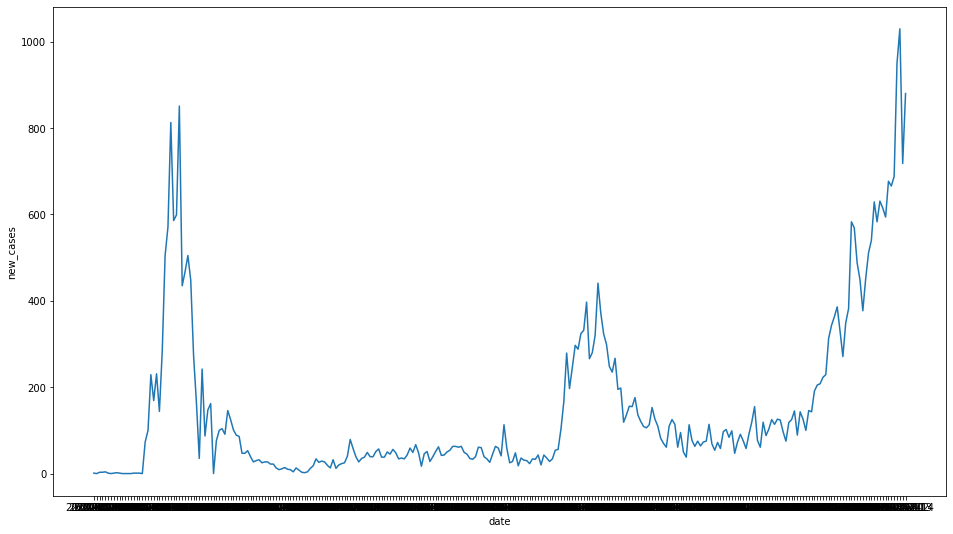

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 9))
sns.lineplot(x=data['date'],y=data["new_cases"])

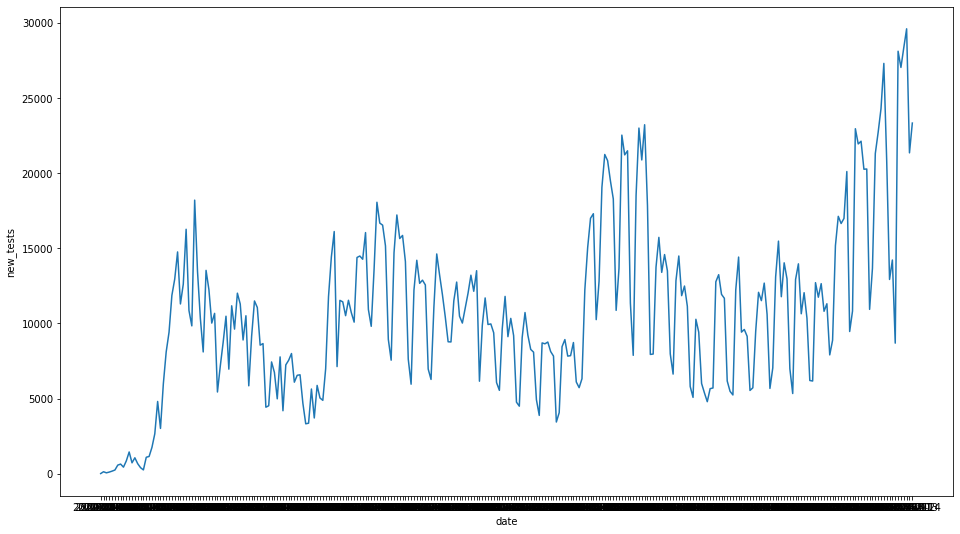

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(x=data['date'],y=data["new_tests"])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['new_cases','new_tests']
scaled_data = scaler.fit_transform(data[scale_cols])

df_scaled = pd.DataFrame(scaled_data)
df_scaled.columns = scale_cols

print(df_scaled)

     new_cases  new_tests
0     0.000971   0.000000
1     0.000000   0.004089
2     0.002913   0.001656
3     0.002913   0.003312
4     0.003883   0.005475
..         ...        ...
281   0.667961   0.913140
282   0.922330   0.957584
283   1.000000   1.000000
284   0.697087   0.721069
285   0.854369   0.788056

[286 rows x 2 columns]


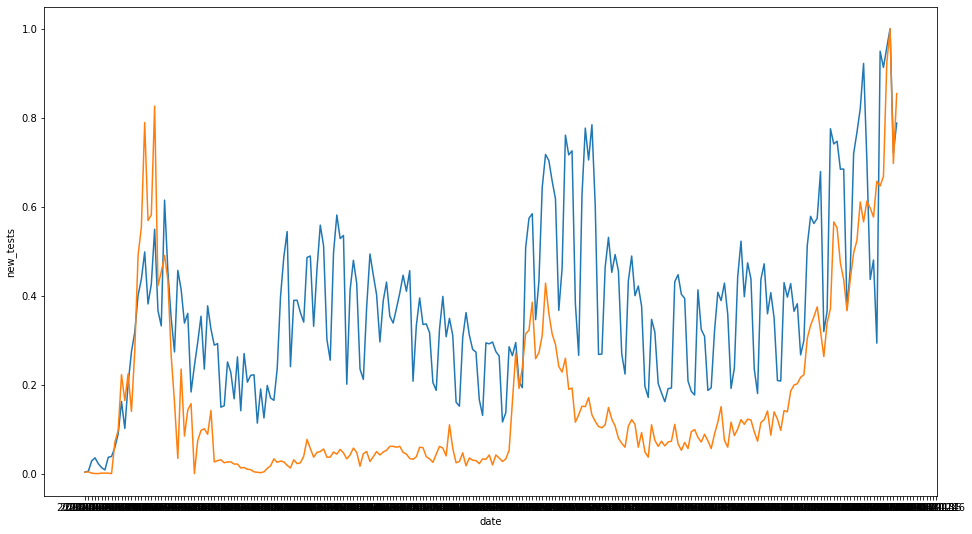

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(x=data['date'],y=df_scaled["new_tests"])
sns.lineplot(x=data['date'],y=df_scaled["new_cases"])

In [ ]:
SIZE = 70
train = df_scaled[:-SIZE]
test = df_scaled[-SIZE:]

print(train)
print(test)

     new_cases  new_tests
0     0.000971   0.000000
1     0.000000   0.004089
2     0.002913   0.001656
3     0.002913   0.003312
4     0.003883   0.005475
..         ...        ...
211   0.061165   0.202582
212   0.072816   0.181391
213   0.062136   0.161586
214   0.070874   0.190888
215   0.072816   0.192409

[216 rows x 2 columns]
     new_cases  new_tests
216   0.110680   0.431121
217   0.066990   0.447141
218   0.052427   0.402934
219   0.069903   0.394045
220   0.056311   0.208159
..         ...        ...
281   0.667961   0.913140
282   0.922330   0.957584
283   1.000000   1.000000
284   0.697087   0.721069
285   0.854369   0.788056

[70 rows x 2 columns]


![](https://raw.githubusercontent.com/HongJeSeong/camp_data/main/img/rnn.PNG)

In [ ]:
import numpy as np
def make_dataset(data, label, window_size):
    feature_list = [] #X 데이터
    label_list = []  #Y 데이터
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [ ]:
feature_cols = ["new_cases","new_tests"]
label_cols = ["new_cases"]

train_feature = train[feature_cols]
train_label = train[label_cols]
test_feature = test[feature_cols]
test_label = test[label_cols]

# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 5)

# train, validation set 생성
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

x_train.shape, x_valid.shape

# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 5)
test_feature.shape, test_label.shape

((65, 5, 2), (65, 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(64,input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

In [ ]:
model.compile(loss='mse', optimizer='adam')
model.fit(x_train, y_train, epochs=50,batch_size=128, validation_data=(x_valid, y_valid))

# 과거 5일 동안의 데이터로 확진자 수 예측

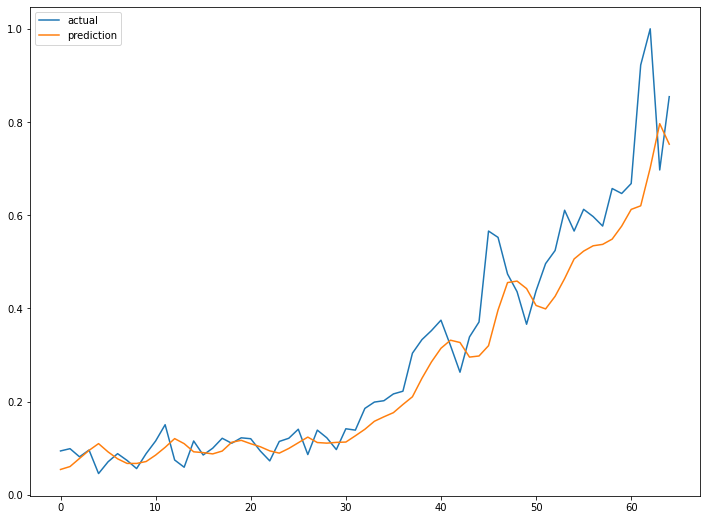

In [ ]:
pred = model.predict(test_feature)
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual') # 실제 데이터 : test_label
plt.plot(pred, label='prediction') # pred 모델을 거쳐서 나오는 예측 값
plt.legend()
plt.show()